# Peguins - Prediciting penguins body mass using a trained linear regression model 

Group 5:Thomas Renwick, Alejandro Medellin, Joy Zhong, Noureldin, Samir Barakat

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_cleaned.csv')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


## Step 1 - Checking data /EDA /Cleaning data

### Data Overview & Preparation  

- **No duplicates or missing values** in the dataset.  
- The dataset contains **3 species, 3 islands, and 2 sexes**, requiring **dummy encoding** (2 columns for species/island, 1 for sex).  
- **Body mass differs by sex**, which may be an important factor for analysis.  


In [4]:
df.duplicated().any() #No duplicates

np.False_

In [5]:
df.isnull().sum() #No null values

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [8]:
df['species'].value_counts() #there are 3 species --> will need 2 dummy columns

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [9]:
df['island'].value_counts() #there are 3 islands --> will need 2 dummy columns

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [10]:
df['sex'].value_counts() #There are 2 sexes --> will need 1 dummy column

sex
male      168
female    165
Name: count, dtype: int64

In [11]:
df.groupby(by = 'sex')['body_mass_g'].mean()

sex
female    3862.272727
male      4545.684524
Name: body_mass_g, dtype: float64

## Step 2 - Feature Engineering

### Data Preprocessing & Encoding  

- **Separated numerical and categorical columns** for better handling.  
- **Encoded categorical variables using one-hot encoding**, dropping the first category to avoid redundancy.  
- **Final dataset now consists of only numerical values**, making it suitable for machine learning models.  


In [12]:
df.info() #Categorical columns are species, island and object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [13]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [14]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    int64  
 3   body_mass_g        333 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 10.5 KB


In [15]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  333 non-null    object
 1   island   333 non-null    object
 2   sex      333 non-null    object
dtypes: object(3)
memory usage: 7.9+ KB


In [16]:
df_objs = pd.get_dummies(df_objs,drop_first=True)


In [17]:
df_objs.head()

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,False,False,False,True,True
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,True


In [18]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [19]:
final_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181,3750,False,False,False,True,True
1,39.5,17.4,186,3800,False,False,False,True,False
2,40.3,18.0,195,3250,False,False,False,True,False
3,36.7,19.3,193,3450,False,False,False,True,False
4,39.3,20.6,190,3650,False,False,False,True,True


# Step 3 - Splitting labels and features

### Splitting Features and Target Variable  

- **Separated target variable (`y = body_mass_g`) from features (`X`).**  
- **`X` contains only predictive features** (bill length, flipper length, species, island, and sex).  
- This step is crucial to ensure **proper model training** without data leakage.  


In [20]:
y = final_df['body_mass_g']
X = final_df.drop('body_mass_g', axis = 1)

In [21]:
y.head()

0    3750
1    3800
2    3250
3    3450
4    3650
Name: body_mass_g, dtype: int64

In [22]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181,False,False,False,True,True
1,39.5,17.4,186,False,False,False,True,False
2,40.3,18.0,195,False,False,False,True,False
3,36.7,19.3,193,False,False,False,True,False
4,39.3,20.6,190,False,False,False,True,True


# Step 4 - Feature Scaling

### Feature Scaling & Train-Test Split  

- **Split the dataset into training (80%) and testing (20%) sets** to evaluate model performance.  
- **Used MinMaxScaler to normalize features**, ensuring all values are scaled between 0 and 1.  
- Scaling is essential for **improving model convergence and preventing bias** towards larger numerical values.  


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5 - Training the model

### Training the Model  

- Implemented **Linear Regression** to predict **body mass** based on selected features.  
- The model was trained on the **scaled training dataset (X_train, y_train)**.  
- This step establishes a mathematical relationship between input features and the target variable.  


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
predictions = model.predict(X_test)

# Step 6 - Evaluating the model

### Evaluating the Model  

- Used **Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)** to measure model performance.  
- **Lower values indicate better predictions**, with RMSE providing a clearer interpretation of error magnitude.  
- These metrics help assess how well the model generalizes to unseen data.  


In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

In [32]:
MAE

225.40920348641527

In [33]:
MSE

78777.6508005661

In [34]:
RMSE #M

np.float64(280.6735662661628)

# Step 7 - Visualization

##  Distribution of Numerical Features

### **Why We Chose Histograms**
Histograms help visualize the spread and distribution of numerical features, allowing us to identify **patterns, clusters, and variations** across penguin species.

---

### **Key Insights**
- **Bill Length (mm):** Appears **bimodal**, suggesting species-based differences.
- **Bill Depth (mm):** More **normally distributed**, showing less variation.
- **Flipper Length (mm):** **Multimodal**, indicating distinct species clusters.
- **Body Mass (g):** **Right-skewed**, meaning some penguins are significantly heavier than others.

### **Takeaways**
- **Flipper Length and Body Mass show the most variation**, making them strong predictors for species classification.
- **Bill Depth varies the least**, meaning it may not contribute as much to differentiating species.
- **Body Mass has the widest spread**, reinforcing its importance in understanding species diversity.

📌 **Conclusion:** These histograms highlight key features that can be used for further analysis and classification models.


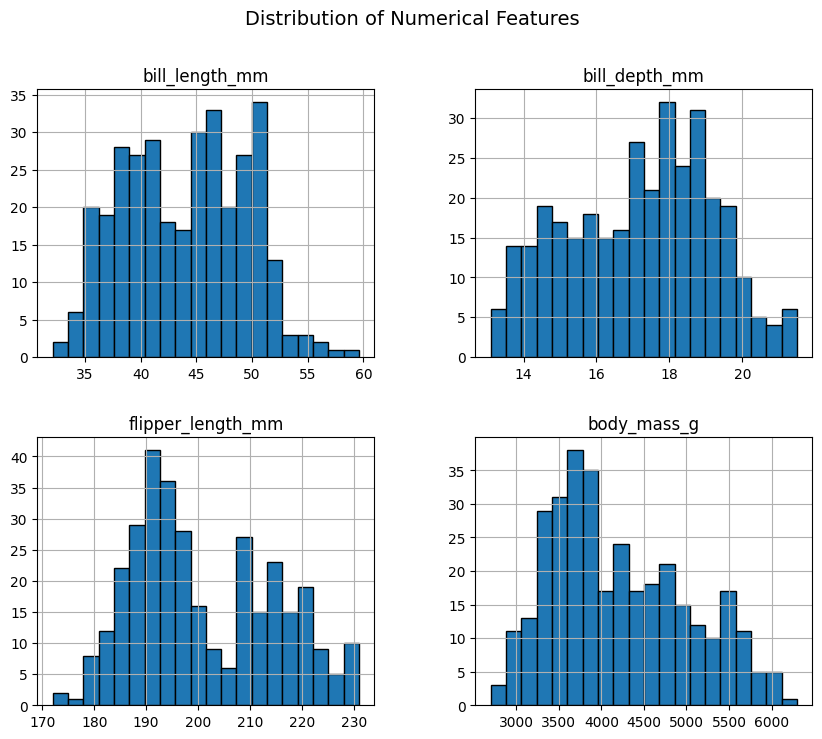

In [35]:
## 1️⃣ Histogram - Distribution of Numerical Features
df.hist(figsize=(10, 8), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

## Identifying the Feature with the Most Spread-Out Data (Relative IQR)

### **1️⃣ Understanding the Interquartile Range (IQR)**
The **Interquartile Range (IQR)** represents the spread of the middle 50% of the data. It is calculated as:

\[
IQR = Q3 - Q1
\]

However, since different features have different units (millimeters vs. grams), we calculate the **Relative IQR** to make comparisons fair:

\[
\text{Relative IQR} = \frac{\text{IQR}}{Q3} \times 100
\]

This expresses **spread as a percentage of Q3**, making it easier to compare features across different scales.

---

### **2️⃣ IQR & Relative IQR for Each Feature**
| **Feature**         | **Q1** | **Q3**  | **IQR (Spread)** | **Relative IQR (%)** |
|---------------------|--------|--------|------------------|----------------------|
| Bill Length (mm)   | 39.50  | 48.60  | **9.10**  | **18.72%** |
| Bill Depth (mm)    | 15.60  | 18.70  | **3.10**  | **16.58%** |
| Flipper Length (mm)| 190.00 | 213.00 | **23.00** | **10.80%** |
| Body Mass (g)      | 3550.00| 4775.00| **1225.00** | **25.67%** |

---

### **3️⃣ Why Is Body Mass the Most Important Feature?**
- **Body Mass has the highest Relative IQR (25.67%)**, meaning it is the most spread-out feature.
- This suggests that **penguin species vary more in body mass than in other physical traits**.
- **Why is this useful?**  
  - **Body mass can be a strong differentiator** between species, helping us identify patterns more clearly.  
  - **It allows for better insights in classification models**, as species with similar bill lengths or flipper sizes may still have distinct body masses.
  - **Higher variation means body mass could be a key predictor** in machine learning models that classify penguins based on physical traits.

📌 **Conclusion:** **Body Mass shows the most variation across penguins, making it the most useful feature for species differentiation and deeper insights into penguin characteristics.**


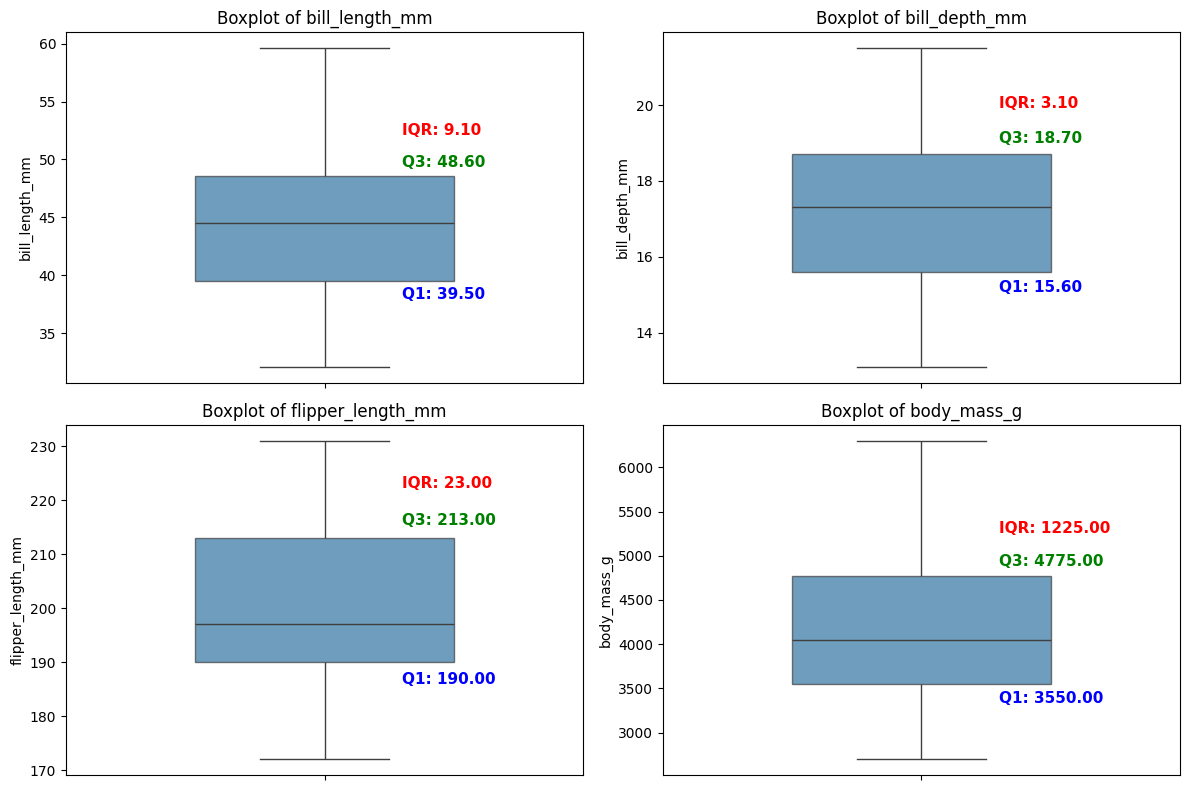

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of numerical features
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# Create a 2x2 layout for the boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through features and plot each on a separate subplot
for i, feature in enumerate(features):
    # Calculate IQR values
    Q1 = np.percentile(df[feature].dropna(), 25)
    Q3 = np.percentile(df[feature].dropna(), 75)
    IQR = Q3 - Q1

    # Create boxplot
    sns.boxplot(y=df[feature], ax=axes[i], width=0.5, boxprops=dict(alpha=0.7))  # Adjust opacity for clarity
    axes[i].set_title(f"Boxplot of {feature}", fontsize=12)

    # Adjust text positioning to avoid overlap
    text_x = 0.15  # Moves text slightly to the side
    axes[i].text(text_x, Q1 - (IQR * 0.2), f"Q1: {Q1:.2f}", verticalalignment='bottom', fontsize=11, color='blue', fontweight='bold')
    axes[i].text(text_x, Q3 + (IQR * 0.2), f"Q3: {Q3:.2f}", verticalalignment='top', fontsize=11, color='green', fontweight='bold')
    axes[i].text(text_x, Q3 + (IQR * 0.5), f"IQR: {IQR:.2f}", verticalalignment='top', fontsize=11, color='red', fontweight='bold')

# Improve layout for a polished look
plt.tight_layout()
plt.show()


## Categorical Feature Distributions

### **Insights & Takeaways**
- **Species Distribution:** Adelie penguins are the most common, followed by Gentoo, with Chinstrap being the least frequent.
- **Island Distribution:** Most penguins are found on **Biscoe** and **Dream** islands, while **Torgersen** has significantly fewer.
- **Sex Distribution:** Nearly **equal representation** of male and female penguins, indicating a balanced dataset.

📌 **Conclusion:** The dataset is well-distributed among species and islands, but Torgersen Island has fewer observations. Species differences may be linked to geographic location.


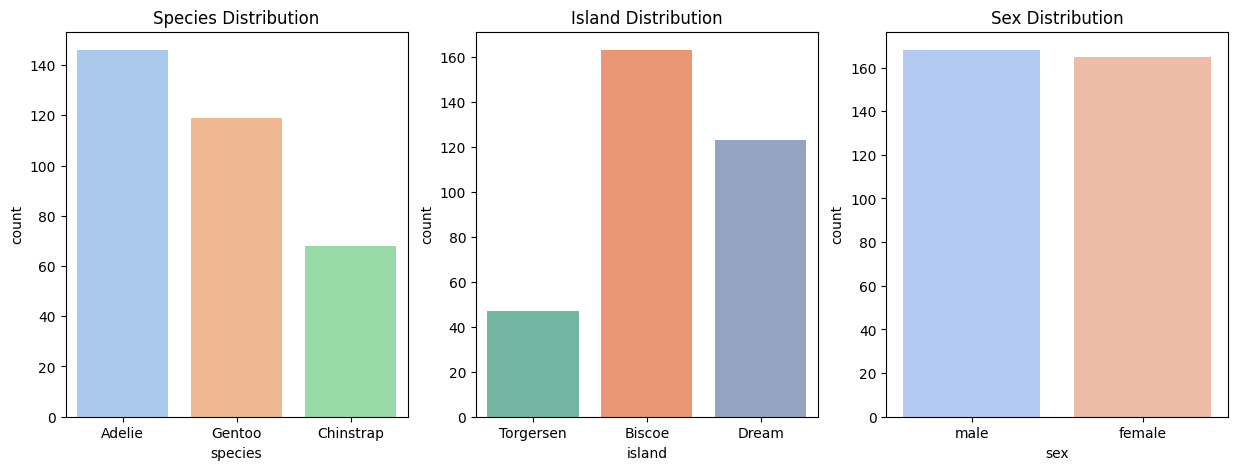

In [38]:
## 3️⃣ Countplots - Categorical Variables (Species, Island, Sex)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Countplot for Species
sns.countplot(x="species", data=df, palette="pastel", hue="species", legend=False, ax=axes[0])
axes[0].set_title("Species Distribution")

# Countplot for Island
sns.countplot(x="island", data=df, palette="Set2", hue="island", legend=False, ax=axes[1])
axes[1].set_title("Island Distribution")

# Countplot for Sex
sns.countplot(x="sex", data=df, palette="coolwarm", hue="sex", legend=False, ax=axes[2])
axes[2].set_title("Sex Distribution")

plt.show()



## Relationship Between Features & Body Mass

### **Insights & Takeaways**
- **Bill Length vs. Body Mass:** A **positive correlation** is observed, with Gentoo penguins having longer bills and higher body mass.
- **Bill Depth vs. Body Mass:** Shows **less clear separation**, but Adelie penguins tend to have deeper bills at lower body masses.
- **Flipper Length vs. Body Mass:** Strong **linear relationship**, suggesting **flipper length is a key predictor** of body mass.

📌 **Conclusion:** **Flipper length and bill length** are the most useful features for predicting body mass, while **bill depth has more overlap** among species.


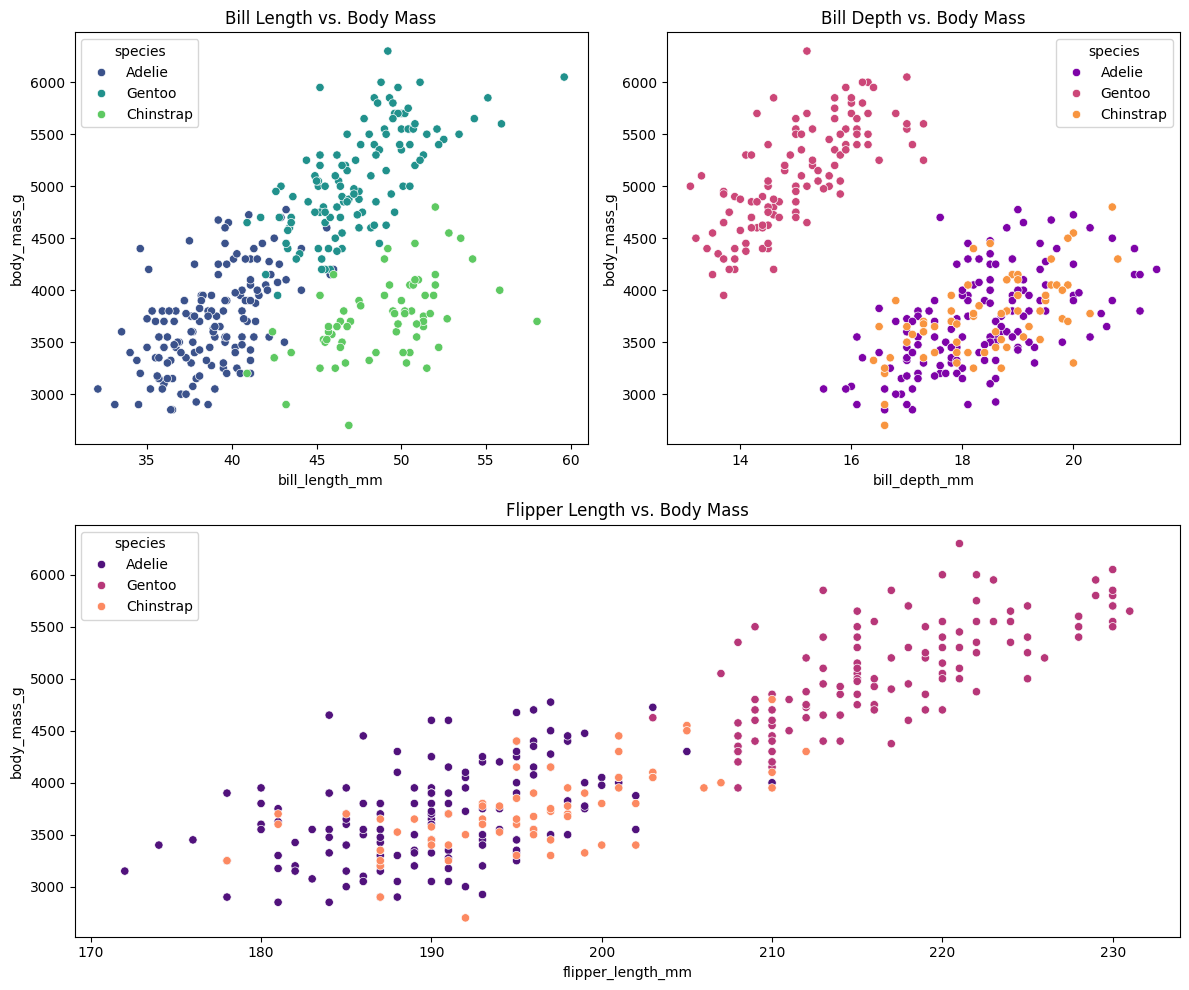

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 10))

# Scatter plot 1: Bill Length vs. Body Mass (Top Left)
plt.subplot(2, 2, 1)
sns.scatterplot(x="bill_length_mm", y="body_mass_g", hue="species", data=df, palette="viridis")
plt.title("Bill Length vs. Body Mass")

# Scatter plot 2: Bill Depth vs. Body Mass (Top Right)
plt.subplot(2, 2, 2)
sns.scatterplot(x="bill_depth_mm", y="body_mass_g", hue="species", data=df, palette="plasma")  # Improved color
plt.title("Bill Depth vs. Body Mass")

# Scatter plot 3: Flipper Length vs. Body Mass (Bottom, Centered)
plt.subplot(2, 1, 2)
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=df, palette="magma")
plt.title("Flipper Length vs. Body Mass")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Pairplot of Numerical Features

### **Insights & Takeaways**
- **Clear species separation:**  
  - **Gentoo penguins (green) have the highest body mass and longest features.**  
  - **Chinstrap (blue) and Adelie (red) overlap more but differ in bill depth.**
- **Strong positive correlations:**  
  - **Flipper length and body mass** show the strongest linear relationship.  
  - **Bill length and body mass** also correlate well, especially in Gentoo penguins.  
- **Bill depth is least effective for species differentiation**, as it shows significant overlap between Adelie and Chinstrap.

📌 **Conclusion:** **Flipper length and body mass are the best features for distinguishing species, while bill depth has more overlap.**  
This visualization confirms that species classification can be effectively based on physical measurements.


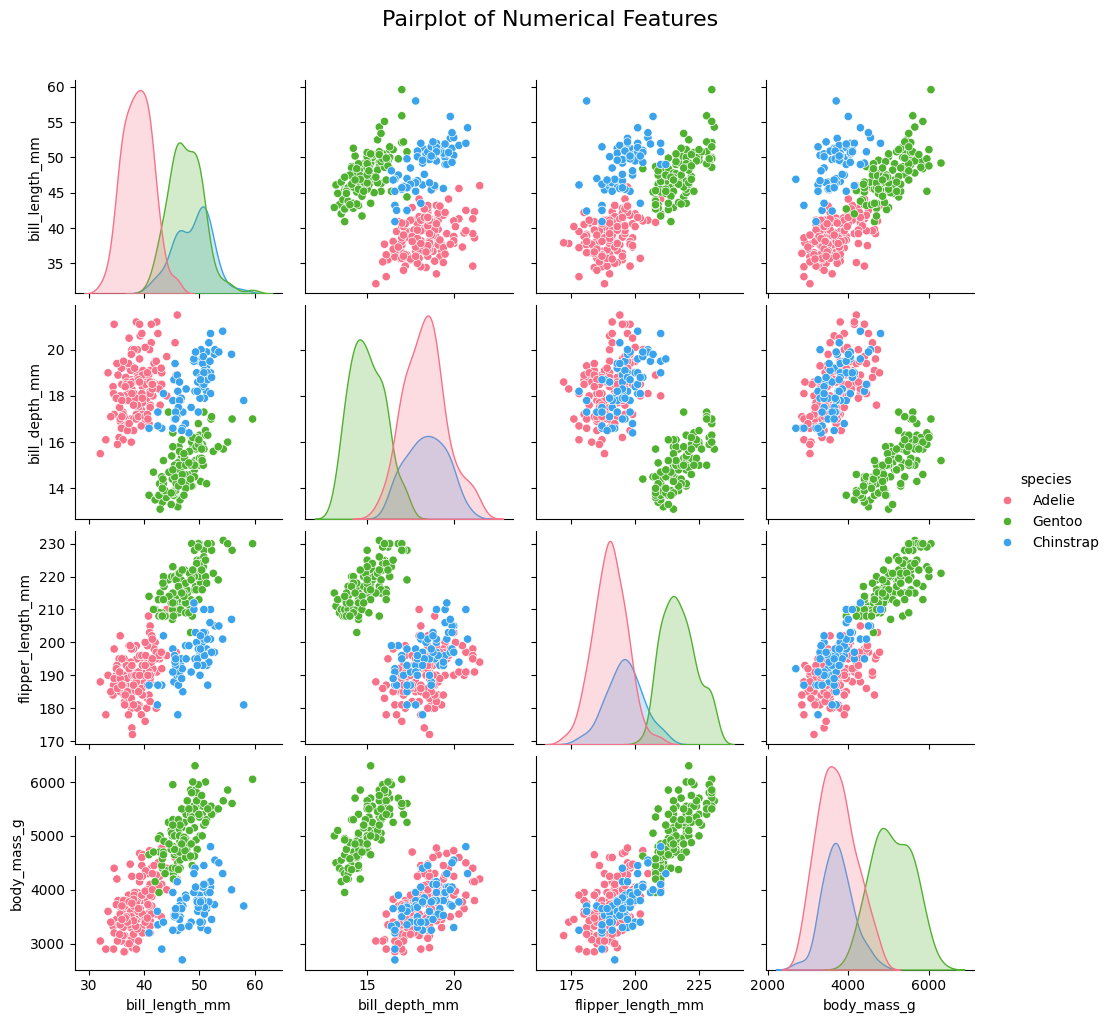

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create Pairplot
g = sns.pairplot(df, hue="species", diag_kind="kde", palette="husl")

# Adjust the title placement
plt.subplots_adjust(top=0.95)  # Moves title slightly below the edge
g.fig.suptitle("Pairplot of Numerical Features", fontsize=16, y=1.02)  # Moves title above plots

plt.show()


## Correlation Heatmap - Feature Relationships

### **Insights & Takeaways**
- **Flipper Length and Body Mass have the strongest correlation (+0.87)**, indicating that penguins with longer flippers tend to have higher body mass.
- **Bill Length is moderately correlated with Body Mass (+0.59)** and Flipper Length (+0.65), suggesting some relationship but with more variation.
- **Bill Depth has the weakest correlations**, showing a **negative correlation** with Flipper Length (-0.58) and Body Mass (-0.47), meaning deeper bills are not strongly linked to larger penguins.

### **Conclusion**
- **Flipper Length and Body Mass** are the most closely related features, making them **key predictors for penguin size**.
- **Bill Depth is the least useful for predicting body mass**, as it does not follow a strong trend.


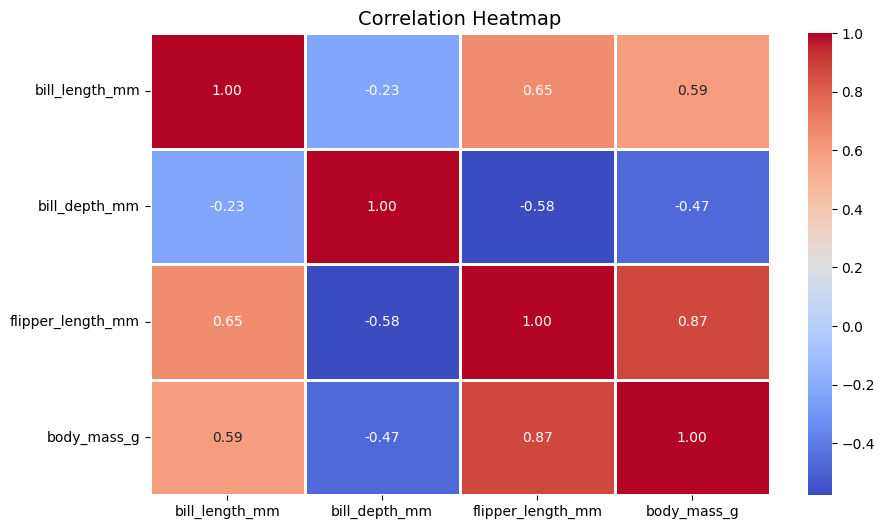

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()
